# Data Exploration
## Virtual Data Collaboratory Undergraduate Data Science Workshop
## November 12, 2020

## Instructor: Ryan Womack

# Topics
- Introduction to Python and Jupyter Notebook environment
- Data handling and data exploration using descriptive statistics and data visualization
- Statistical analysis of a dataset using correlation and regression
- Introduction to the concept of training and testing data splits for machine learning and forecasting applications

## About Jupyter Notebooks and Python
Python is a general purpose computing language. Some of you may be familiar with it.  It is arguably the most popular language for data science applications due to the large number of statistical and computing modules that have been created for working with data.

The Jupyter Notebook is an interactive environment that allows Python code (and other programming languages) to be run alongside explanatory text (like this text), and to view results of code in the same document.  For this reason, it is particularly useful for learning and exploration.

## Executing Code
You can run the code cells in a Jupyter notebook by clicking in the cell and either clicking "Run" in the menu, or by selecting the keys "Control + Enter".  In Google Colab, you can also press the "Play" button icon.  The numbers that will appear to the left of the cell indicate the order in which commands are run.  It is important to run commands in the proper sequence.

## Importing Python modules
Using Python typically involves loading several specialized modules.  These modules contain many of the graphing and statistical tools we will use.  Run the following cell to import these modules and their specific features.  In this session we are focused on the data exploration process and not the Python language itself, but by seeing this code in action, you can get a sense of what your own Python programming might involve.

In [96]:
# Run this cell, but please don't change it.

# These lines import Numpy and Pandas for data analysis, and Seaborn and Matplotlib for visualization

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
from statsmodels.api import OLS
from sklearn import linear_model

from google.colab import files

# "Magic" command below allows you to see plot in the notebook
%matplotlib inline

ModuleNotFoundError: No module named 'google'

## Mount Google Drive

One additional piece of setup.  We need to first mount the Google Drive in Colab before we can read data from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Working with Data
In most real-world data analysis situations, you must spend a significant amount of time to learn about your data and clean and prepare it for analysis.  We will work with a few datasets that have already been set up for you, so that you can focus on the concepts involved, instead of the details of data preparation.

We will work through one example togther, then you will have a choice of datasets to try out as an exercise.

# Life Expectancy

This dataset is an extract from the World Bank's Gender Statistics dataset, using 2018 data.  
https://datacatalog.worldbank.org/dataset/gender-statistics

We will look at *life expectancy* among females in various countries around the world, and try to understand some other variables that relate to it.

## Importing Data

We read data directly from its web location (the github site for this workshop).  

In [9]:
life = pd.read_csv('https://github.com/ryandata/VDC_Data_Science_Workshop/raw/main/life.csv')

Print the data to see it and make sure that it is loaded correctly.

In [54]:
print(life)

                      Country  Adolescent_Fertility  Birth_Rate  Death_Rate  \
0                        Chad              157.9144      42.172      12.104   
1                     Nigeria              105.4470      37.905      11.860   
2    Central African Republic              126.9636      35.348      12.289   
3                Sierra Leone              110.2282      33.406      11.745   
4                      Guinea              133.3650      36.364       8.452   
..                        ...                   ...         ...         ...   
158                    Cyprus                4.4586      10.462       7.022   
159                Luxembourg                4.6038      10.300       7.100   
160                  Slovenia                3.6524       9.400       9.900   
161                   Iceland                5.9066      12.000       6.400   
162                   Finland                5.6588       8.600       9.900   

     Fertility_Rate  GDP_per_capita  Life_Expectanc

We use a few other commands to explore the data.  Columns lets us see the variable names. Shape lets us see the dimensions of the data. Info lets us see the variable formats.

In [6]:
life.columns

Index(['Country', 'Adolescent_Fertility', 'Birth_Rate', 'Death_Rate',
       'Fertility_Rate', 'GDP_per_capita', 'Life_Expectancy', 'Mortality_Rate',
       'Prob_Survival_to_5'],
      dtype='object')

In [7]:
life.shape

(163, 9)

In [10]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               163 non-null    object 
 1   Adolescent_Fertility  163 non-null    float64
 2   Birth_Rate            163 non-null    float64
 3   Death_Rate            163 non-null    float64
 4   Fertility_Rate        163 non-null    float64
 5   GDP_per_capita        163 non-null    float64
 6   Life_Expectancy       163 non-null    float64
 7   Mortality_Rate        163 non-null    float64
 8   Prob_Survival_to_5    163 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.6+ KB


In [ ]:
Describe provides summary statistics of each variable

In [11]:
life.describe()

,Adolescent_Fertility,Birth_Rate,Death_Rate,Fertility_Rate,GDP_per_capita,Life_Expectancy,Mortality_Rate,Prob_Survival_to_5
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,46.808801,20.335503,7.739227,2.697425,14801.408272,74.885098,19.086503,0.973736
std,40.238103,10.013836,2.768479,1.287651,20642.308680,7.843145,17.865335,0.027198
min,1.320400,6.400000,1.202000,0.977000,271.752044,54.991000,1.500000,0.884479
25%,12.283700,10.950000,5.928000,1.685000,1703.168600,68.931000,5.200000,0.957619
50%,38.852000,17.857000,7.214000,2.222000,5805.675616,76.960000,12.500000,0.985345
75%,69.120800,28.911500,9.405500,3.600000,17203.941600,80.702000,29.700000,0.993718
max,183.513400,46.079000,15.400000,6.913000,116654.261100,87.320000,77.600000,0.998333


Who has the highest life expectancy?
Let's sort the data and look at the top ranking countries.

In [12]:
life.sort_values(by='Life_Expectancy', ascending=False).head()

,Country,Adolescent_Fertility,Birth_Rate,Death_Rate,Fertility_Rate,GDP_per_capita,Life_Expectancy,Mortality_Rate,Prob_Survival_to_5
156,Japan,3.6644,7.4,11.0,1.420,39159.42356,87.32,1.8,0.997567
151,Spain,7.4904,7.9,9.1,1.260,30337.67913,86.30,2.4,0.997155
138,France,4.7362,11.3,9.2,1.880,41631.09074,85.90,3.3,0.996333
136,Switzerland,2.6438,10.0,7.8,1.520,82818.10816,85.70,3.3,0.996163
148,"Korea, Rep.",1.3204,6.4,5.8,0.977,33340.26515,85.70,2.5,0.996970


## Visualize the relationship between two variables using a scatter plot

Plot each data point according to the value of two of the variables.  Observe the pattern that results.

Closely grouped and steeply sloped lines will indicate a strong relationship between variables.  Note that the relationship may not always be linear.  Learning to work with more complex models that capture these nuances of the relationships is a key part of data science. 

Note: We are using the *seaborn* package for visualization in Python.  Along with *matplotlib*, it is one of the most commonly used visualization tools for Python.

First, we compare Life Expectancy to Mortality Rate.  What can we say about this relationship?

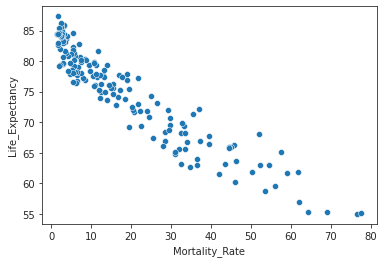

In [59]:
x_value = life['Mortality_Rate']
y_value = life['Life_Expectancy']

with sns.axes_style('ticks'):
    sns.scatterplot(x=x_value, y=y_value)

plt.show()

We can also compare all variables to each other using a pair plot.

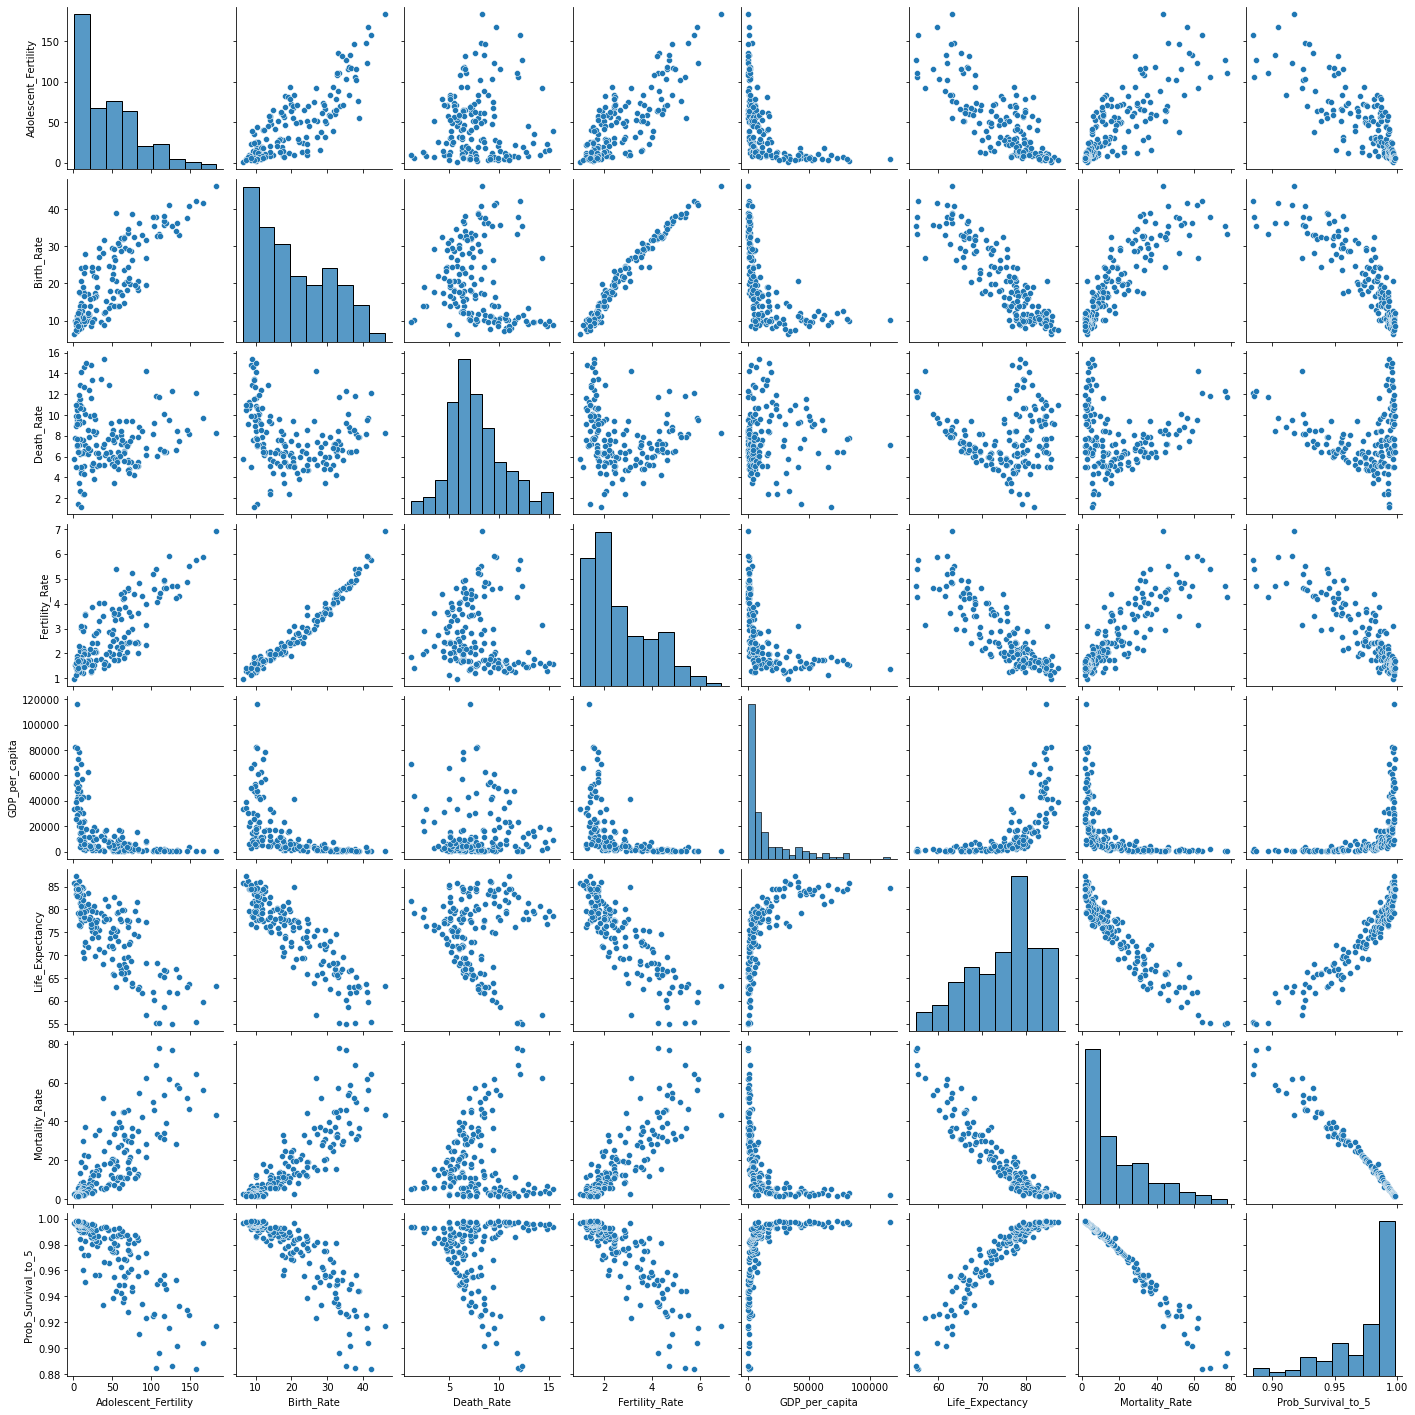

In [60]:
sns.pairplot(life)

We can also look at how data is distributed--for example, Life Expectancy.  One way is via a histogram.

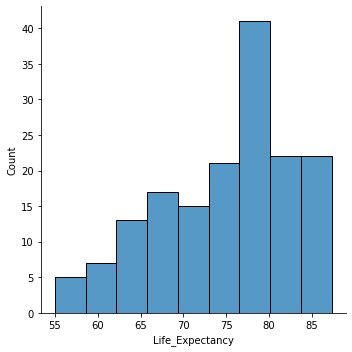

In [61]:
sns.displot(y_value)


Another is by estimating the distribution of the data (Kernel Density Estimation)

In [ ]:
sns.displot(y_value, kind="kde")



Or we can combine both on the same plot.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

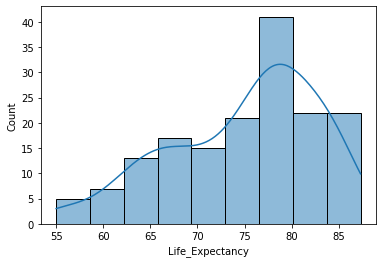

In [24]:
sns.displot(y_value, kde="True")

Our final visualization returns us to the scatterplot, but with a **regression line** through the data.  This line is the best linear fit to the data, and can be viewed as estimating the relationship between x and y, if that relationship were reduced to a linear equation.  The process of computing this estimate is called **regression**.

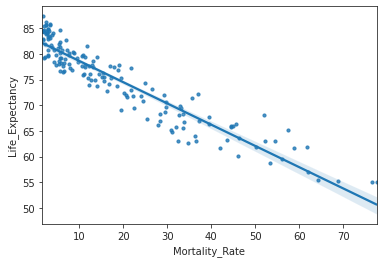

In [62]:
x_value = life['Mortality_Rate']
y_value = life['Life_Expectancy']

# Plotting regression, with figure-specific style change to white/grid-less background
with sns.axes_style('ticks'):
    sns.regplot(x=x_value, y=y_value, scatter_kws={'s':10})

plt.show()

# Correlation and Regression

## Correlation
**Correlation** is a measure of the strength of the relationship between two variables, ranging from -1 (strongest negative relationship) to 0 (no relationship) to 1 (strongest positive relationship). The relationship may be causal or simply an association, but if a correlation is present, knowing something about one variable means we can make an educated guess, or prediction, about the second variable.
We can test the correlation between two variables:

In [55]:
life.corr()

,Adolescent_Fertility,Birth_Rate,Death_Rate,Fertility_Rate,GDP_per_capita,Life_Expectancy,Mortality_Rate,Prob_Survival_to_5
Adolescent_Fertility,1.000000,0.824840,-0.010002,0.803771,-0.537860,-0.792798,0.792482,-0.809425
Birth_Rate,0.824840,1.000000,-0.198336,0.981277,-0.565734,-0.886066,0.864450,-0.871394
Death_Rate,-0.010002,-0.198336,1.000000,-0.128316,-0.003043,-0.049638,0.045875,-0.078748
Fertility_Rate,0.803771,0.981277,-0.128316,1.000000,-0.505006,-0.856167,0.843224,-0.865904
GDP_per_capita,-0.537860,-0.565734,-0.003043,-0.505006,1.000000,0.629651,-0.533464,0.501438
Life_Expectancy,-0.792798,-0.886066,-0.049638,-0.856167,0.629651,1.000000,-0.942069,0.935241
Mortality_Rate,0.792482,0.864450,0.045875,0.843224,-0.533464,-0.942069,1.000000,-0.985687
Prob_Survival_to_5,-0.809425,-0.871394,-0.078748,-0.865904,0.501438,0.935241,-0.985687,1.000000


In [ ]:
Or we can look at all of the correlations in a dataset.

In [ ]:
life.corr()

Here "Probability of Survival to Age 5" has the highest correlation (in absolute value) to Life Expectancy, so it might be one of the first variables to consider when building a regression model to explain the relationship.

In [ ]:
We can also visualize the correlation matrix.

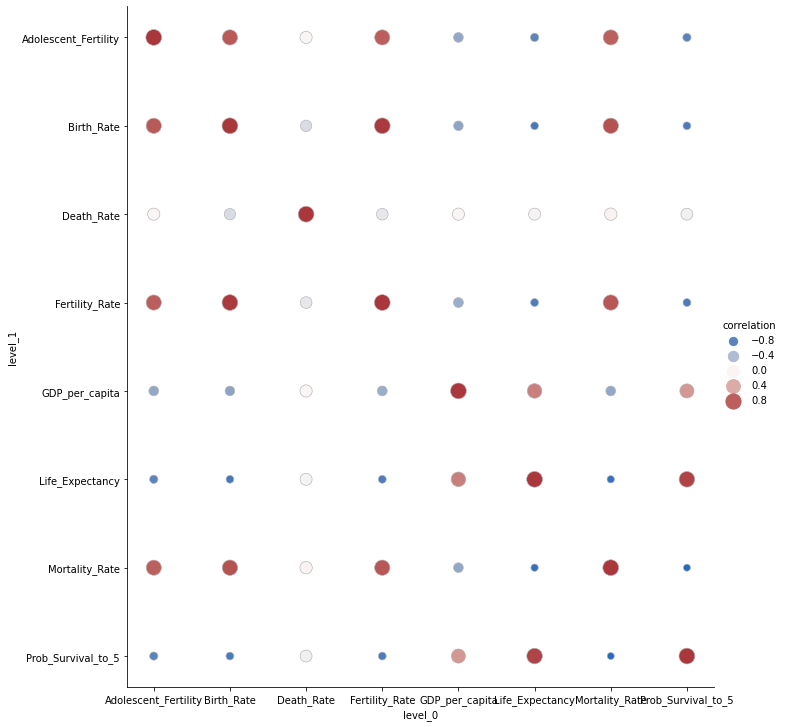

In [69]:
corr_mat = life.corr().stack().reset_index(name="correlation")
sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250)
)


## Regression

Our final step will be to actually compute the regression equation.  Here we build a model with some of the likely variables, and see how much explanatory power it has.  Our equation will be of the form
*y* = *c* + a1*x1* + a2*x2* + ... an*xn*
where *y* is our *response* variable (or dependent variable), which we are trying to explain. The *x* variables represent the *explanatory* variables (or independent variables) that we believe affect *y*.  The a's are coefficients on the *x* variables. Finally, *c* is a constant that will be computed by the regression process.
The key is to choose the *x* variables wisely. We will start with the one that has the highest correlation to *y*, and then move down the list.
In the case of Life Expectancy, we found that Probablity of Survival to age 5 was most closely related, so we build the regression as follows.

Note that we are using the linear regression tools from *scikit-learn*.  Scikit-learn (https://scikit-learn.org/) is one of the most powerful and popular tools for machine learning in Python.

Specify our Y and X for the model

In [83]:
y = life.iloc[:, 'Life_Expectancy'].values
print(Y)

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [90]:
X=life[['Prob_Survival_to_5']]
print(X)

     Prob_Survival_to_5
0              0.884479
1              0.884979
2              0.886728
3              0.896407
4              0.901725
..                  ...
158            0.997708
159            0.997724
160            0.997938
161            0.998142
162            0.998333

[163 rows x 1 columns]


The next step is necessary to convert the data into a form that the regression algorithm can process.

Create linear regression object

In [91]:
regr = linear_model.LinearRegression()

In [ ]:
Fit the model

In [92]:
regr.fit(X, Y)

LinearRegression()

In [ ]:
Plot the results

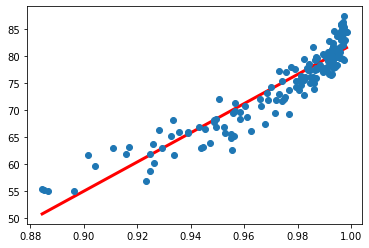

In [104]:
plt.plot(X, regr.predict(X), color='red',linewidth=3)
plt.plot(X,Y,'o')

We can also get some very detailed statistics on the regression fit.  For now, just look at two things in the output below.  
*R-squared* is one measure of how good the fit it.  It ranges from 0 to 1, with 1 meaning that the equation completely explains all of the variance in the data (best fit).  There is a bit more to it than that, but that is a good enough approximation for now.
The *coef* is the coefficient on our explanatory variable.  It this case, it means we can take the Probability of Survival to Age 5 and multiply it by 77 to get an estimate of Life Expectancy that will be reasonably accurate.
This gives you a sense of how regression can work as a predictor. We'll return to that topic later.

In [97]:
OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_Expectancy   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.610e+04
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                   6.32e-181
Time:                        01:15:05   Log-Likelihood:                         -520.97
No. Observations:                 163   AIC:                                      1044.
Df Residuals:                     162   BIC:                                      1047.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prob_Survival_to_5    77.0543      0.477    161.561      0.000      76.113      77.996
==============================================================================
Omnibus:                       10.848   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.628
Skew:                          -0.403   Prob(JB):                       0.0221
Kurtosis:                       2.313   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also consider multiple regression, with more than one explanatory variable, along with many other variations.  In the interest of time, however, we'll just be using one variable models in this workshop.

# Exercises/Case Studies
What follows are 4 case studies that you will work through as individual exercises.  Choose ONE that interests you, and explore the data using our tools for data exploration, visualization, and regression.
The cases are:
    - Cardiovascular Disease (Science)
    - World Development (Social Science)
    - World Economy (Business/Economics)
    - Environment (Another Science)
    
In each case, there are only a few "moving parts" - cells where you will edit the code to select variables and parameters.  Look for the **EDIT HERE** statement.  Be careful to run cells in order.

## Case Study 1: Cardiovascular Disease

The original data has records of 70,000 patients.  See
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset for details.  The dataset presented for this class is a sample of 1000 patients (for rapid analysis), and has been cleaned of outliers.

The variable "cardio" is an indicator of whether or not cardiovascular disease is present.  For now, let's try to predict what is linked to high blood pressure (ap_hi in the dataset).

In [43]:
cardio = pd.read_csv('https://github.com/ryandata/VDC_Data_Science_Workshop/raw/main/cardio.csv')

In [44]:
cardio.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [45]:
cardio.shape

(1000, 13)

In [29]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [46]:
cardio.describe()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,507.540000,19465.412000,1.347000,164.623000,74.861200,126.718000,81.447000,1.371000,1.231000,0.092000,0.063000,0.82000,0.498000
std,291.668409,2512.108038,0.476254,8.105836,14.335224,16.483938,8.901822,0.695588,0.572684,0.289171,0.243085,0.38438,0.500246
min,1.000000,14327.000000,1.000000,137.000000,41.000000,12.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,256.750000,17633.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,508.500000,19743.500000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,759.250000,21369.250000,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,1011.000000,23656.000000,2.000000,196.000000,164.000000,210.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


Some variables are categorical - for example, the cholesterol level is given a rating from 1 to 3 (good to worst). For a zero-one variable like smoking, a zero typically means "no" (in this case non-smoking) or "yes" (smoking).

In [47]:
cardio.sort_values(by='weight', ascending=False).head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
170,174,20464,1,164,164.0,140,90,3,3,0,0,1,1
756,766,21135,1,159,153.0,120,80,1,1,0,0,1,1
495,504,23375,2,169,134.0,140,90,1,1,0,0,1,1
4,5,20431,2,160,130.0,200,100,1,1,1,1,1,1
703,713,15811,2,193,120.0,120,80,3,2,0,0,1,1


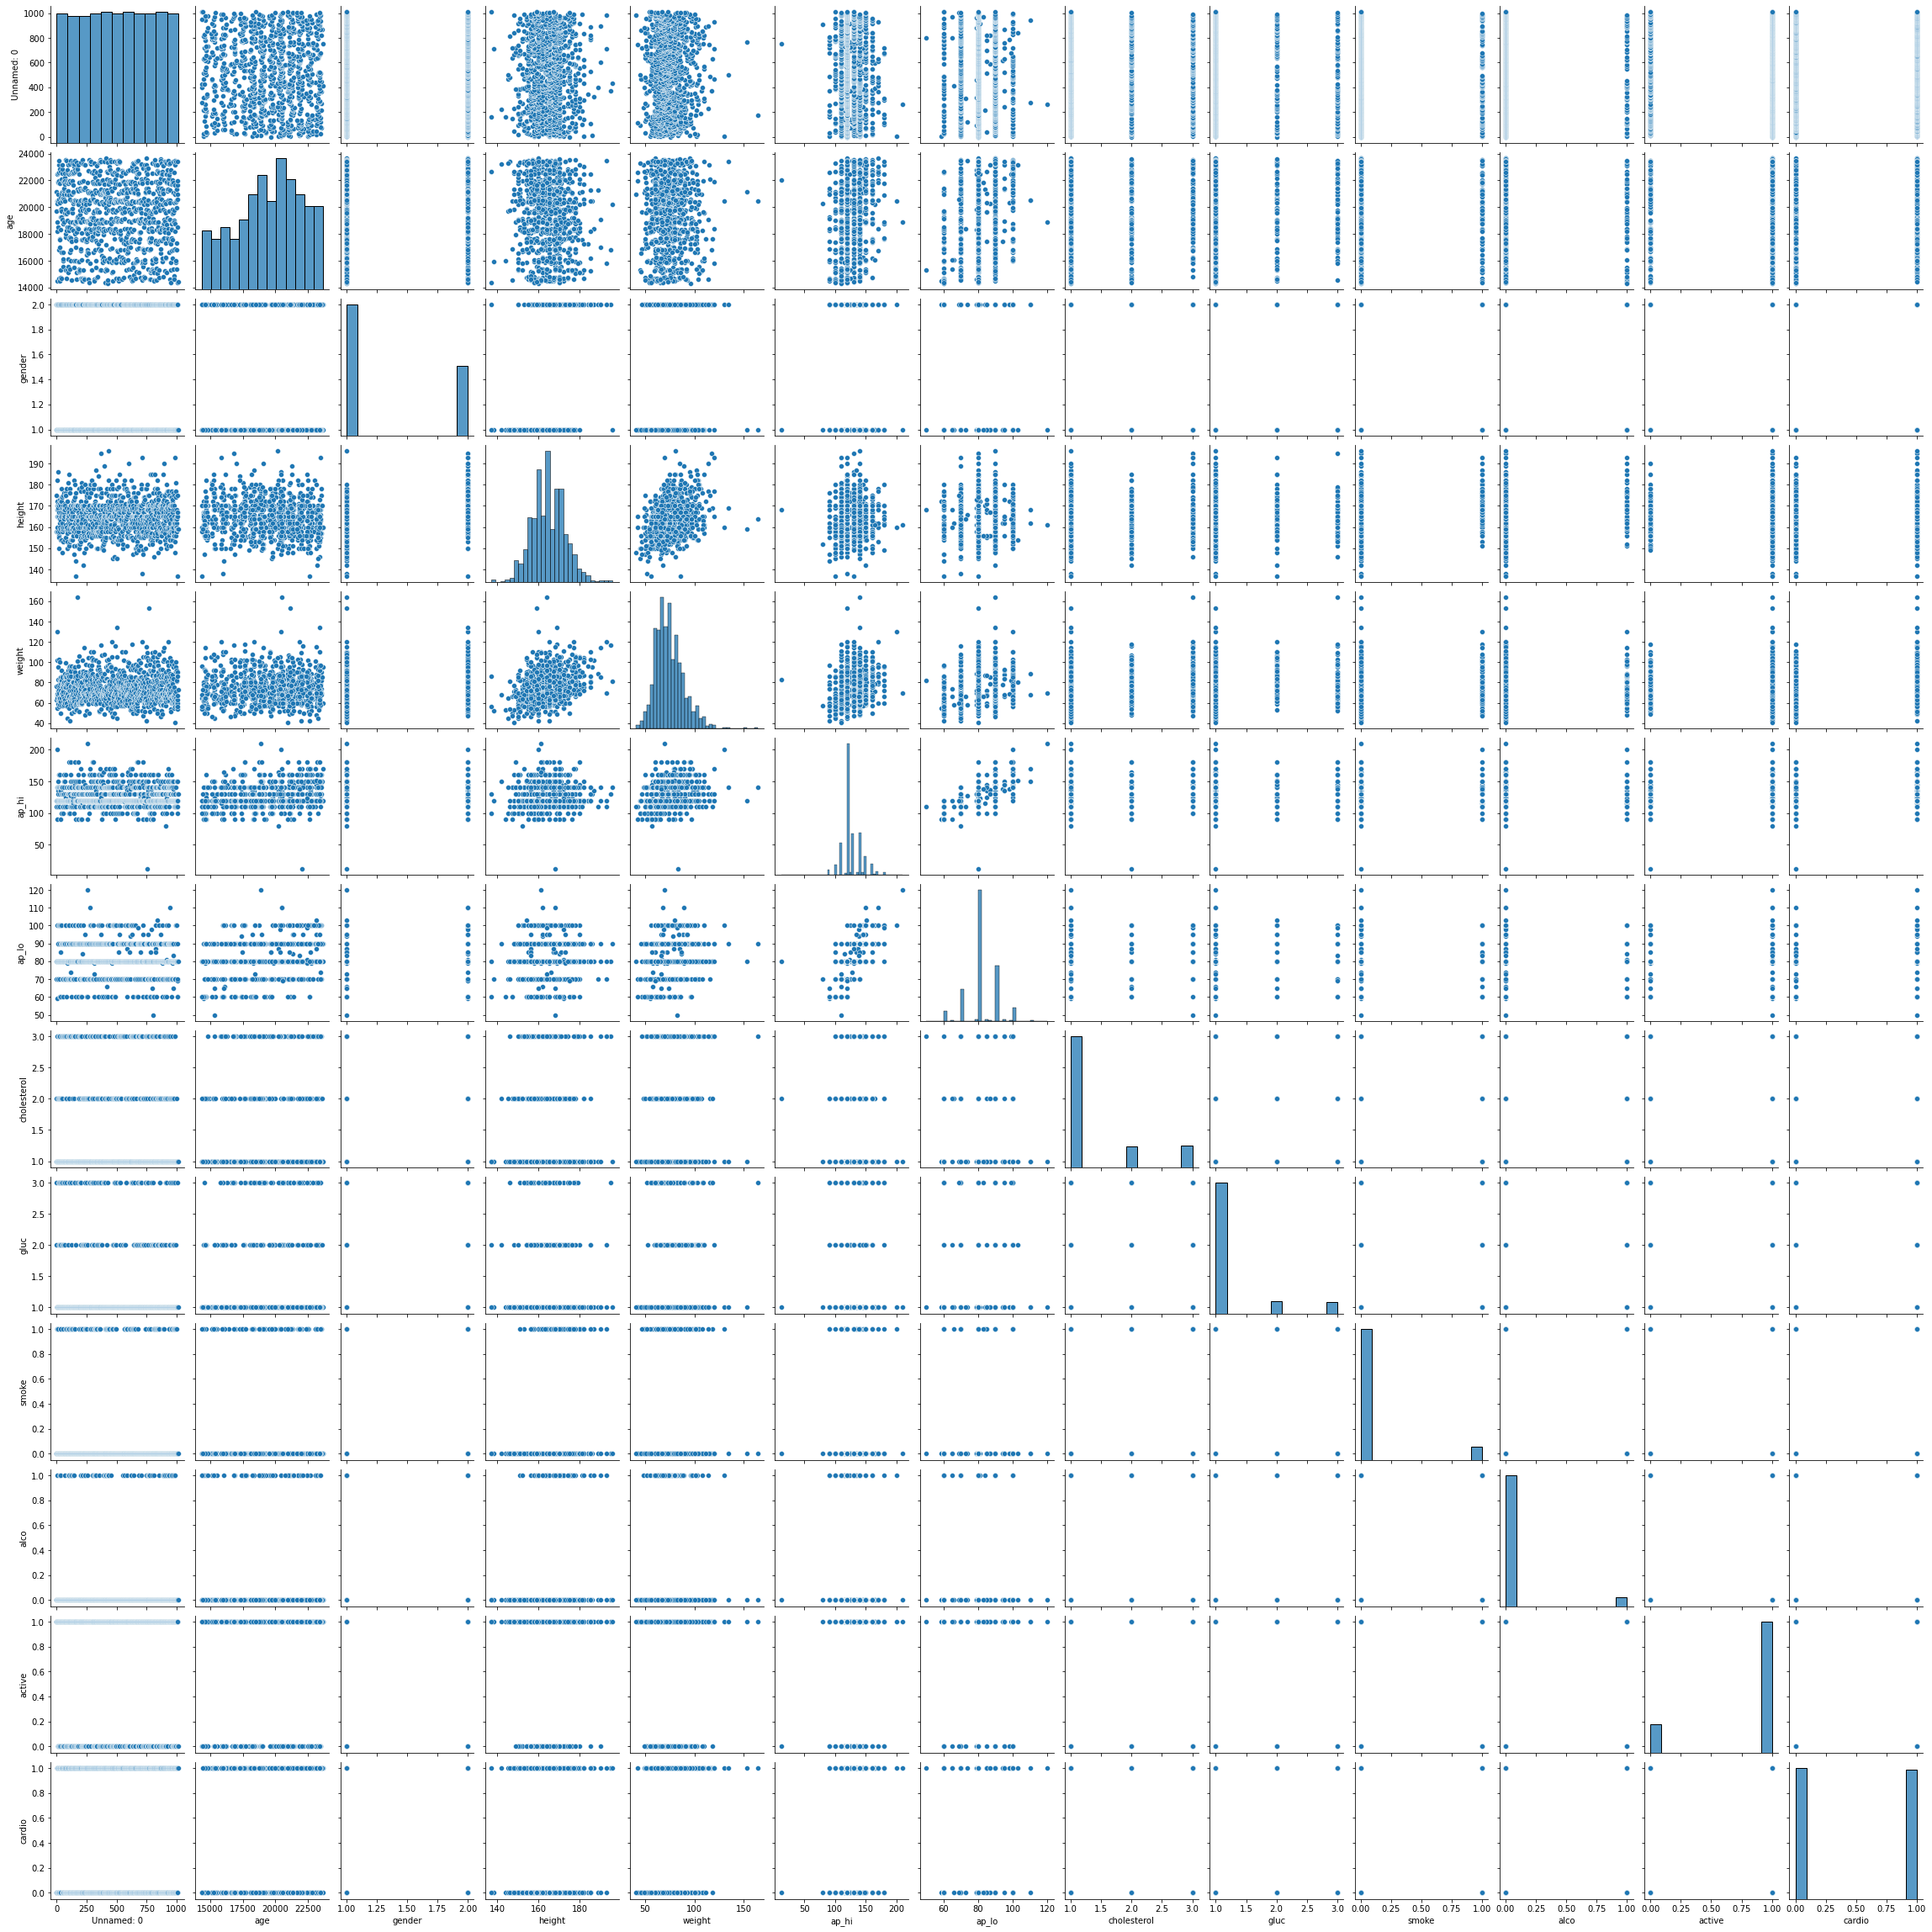

In [48]:
sns.pairplot(cardio)

Here the pairplot is a bit hairy.  There are many variables, and the categorical variables are hard to interpret with this kind of visualization.  We can move on to examining individual combinations.

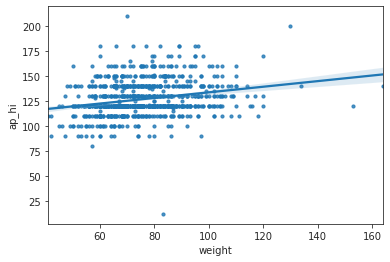

In [49]:
x_value = cardio['weight']
y_value = cardio['ap_hi']

# Plotting regression, with figure-specific style change to white/grid-less background
with sns.axes_style('ticks'):
    sns.regplot(x=x_value, y=y_value, scatter_kws={'s':10})

plt.show()

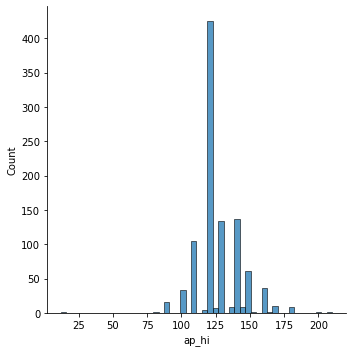

In [57]:
sns.displot(y_value)


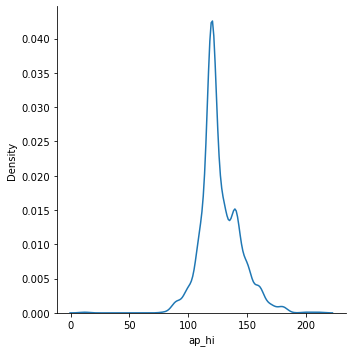

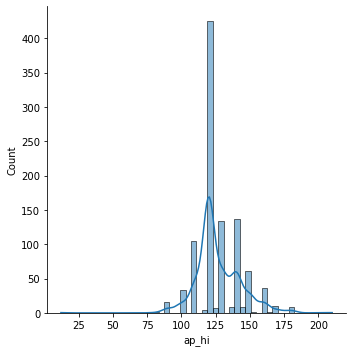

In [53]:
sns.displot(y_value, kde="True")